In [3]:
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #% matplotlib inline
from art import tprint
# url ="C:\\Users\\Admin\\Desktop\\datases\\UMAP\\soybean-large.data" # home_pc
url= "C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.data" # laptop
# http://archive.ics.uci.edu/dataset/90/soybean+large

# MinMaxScaler
### Масштабирование функций таким образом, чтобы они находились между заданным минимальным и максимальным значением, часто между нулем и единицей, или так, чтобы максимальное абсолютное значение каждой функции масштабировалось до размера единицы. Этого можно добиться с помощью MinMaxScaler или MaxAbsScaler соответственно.


# StandardScaler
### Стандартизируйте функции, удалив среднее значение и масштабируя его до единичной дисперсии.

### Стандартный балл выборки xрассчитывается как:

z = (x - u)/s

### где u— среднее значение обучающих выборок или ноль with_mean=False, если и s— стандартное отклонение обучающих выборок или единица, если with_std=False.

### Центрирование и масштабирование происходят независимо для каждого признака путем вычисления соответствующей статистики по выборкам в обучающем наборе. Затем среднее значение и стандартное отклонение сохраняются для использования в последующих данных с помощью transform.
### StandardScalerчувствителен к выбросам, и при наличии выбросов объекты могут масштабироваться по-разному.

# RobustScaler 
### Масштабируйте объекты, используя статистику, устойчивую к выбросам.

### Этот скалер удаляет медиану и масштабирует данные в соответствии с квантильным диапазоном (по умолчанию IQR: межквартильный диапазон). IQR — это диапазон между 1-м квартилем (25-й квантиль) и 3-м квартилем (75-й квантиль).

### Центрирование и масштабирование происходят независимо для каждого признака путем вычисления соответствующей статистики по выборкам в обучающем наборе. Затем медиана и межквартильный размах сохраняются для использования в последующих данных с помощью этого transformметода.

### Стандартизация набора данных — это обычная предварительная обработка для многих специалистов по оценке машинного обучения. Обычно это делается путем удаления среднего значения и масштабирования до единичной дисперсии. Однако выбросы часто могут отрицательно влиять на выборочное среднее/дисперсию. В таких случаях использование медианы и интерквартильного размаха часто дает лучшие результаты. 

In [4]:


def umap_function(df, method):

    if method=='MinMax':
        scaler = MinMaxScaler()
    elif method=='Standard':
        scaler = preprocessing.StandardScaler()
    else:
        scaler = preprocessing.RobustScaler()
    
    X= scaler.fit_transform(df)



    manifold = umap.UMAP().fit(X)
    X_reduced = manifold.transform(X)
    return X_reduced

def tsne_function(df, method):
    if method=='MinMax':
        scaler = MinMaxScaler()
    elif method=='Standard':
        scaler = preprocessing.StandardScaler()
    else:
        scaler = preprocessing.RobustScaler()

    X= scaler.fit_transform(df)
 
    embed = TSNE(
        n_components=2, # значение по умолчанию=2. Размерность вложенного пространства.
        perplexity=20, # значение по умолчанию=30.0. Перплексия связана с количеством ближайших соседей, которое используется в других алгоритмах обучения на множествах.
        early_exaggeration=12, # значение по умолчанию=12.0. Определяет, насколько плотными будут естественные кластеры исходного пространстве во вложенном пространстве и сколько места будет между ними. 
        learning_rate=200, # значение по умолчанию=200.0. Скорость обучения для t-SNE обычно находится в диапазоне [10.0, 1000.0]. Если скорость обучения слишком высока, данные могут выглядеть как "шар", в котором любая точка приблизительно равноудалена от ближайших соседей. Если скорость обучения слишком низкая, большинство точек могут быть похожими на сжатое плотное облако с незначительным количеством разбросов. 
        n_iter=5000, # значение по умолчанию=1000. Максимальное количество итераций для оптимизации. Должно быть не менее 250.
        n_iter_without_progress=300, # значение по умолчанию=300. Максимальное количество итераций без прогресса перед прекращением оптимизации, используется после 250 начальных итераций с ранним преувеличением.
        min_grad_norm=0.0000001, # значение по умолчанию=1e-7. Если норма градиента ниже этого порога, оптимизация будет остановлена.
        metric='euclidean', # значение по умолчанию='euclidean', Метрика, используемая при расчете расстояния между экземплярами в массиве признаков.
        init='random',# {'random', 'pca'} или ndarray формы (n_samples, n_components), значение по умолчанию='random'. Инициализация вложения.
        verbose=0, # значение по умолчанию=0. Уровень детализации.
        random_state=42, # экземпляр RandomState или None, по умолчанию=None. Определяет генератор случайных чисел. Передача int для воспроизводимых результатов при многократном вызове функции.
        method='barnes_hut', # значение по умолчанию='barnes_hut'. По умолчанию алгоритм вычисления градиента использует аппроксимацию Барнса-Хата, работающую в течение времени O(NlogN). метод='exact' будет работать по более медленному, но точному алгоритму за время O(N^2). Следует использовать точный алгоритм, когда количество ошибок ближайших соседей должно быть ниже 3%.
        angle=0.5, # значение по умолчанию=0.5. Используется только если метод='barnes_hut' Это компромисс между скоростью и точностью в случае T-SNE с применением алгоритма Барнса-Хата.
        n_jobs=-1, # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
            )

    # Преобразование X
    X_embedded = embed.fit_transform(X)

    return X_embedded

In [5]:


col_names = ["class"
,"date"		    
,"plant-stand"
,"precip"
,"temp"
,"hail"
,"crop-hist"
,"area-damaged"
,"severity"
,"seed-tmt"
,"germination"
,"plant-growth"
,"leaves"
,"leafspots-halo"
,"leafspots-marg"
,"leafspot-size"
,"leaf-shread"
,"leaf-malf"
,"leaf-mild"
,"stem"
,"lodging"
,"stem-cankers"
,"canker-lesion"
,"fruiting-bodies"
,"external decay"
,"mycelium"
,"int-discolor"
,"sclerotia"
,"fruit-pods"
,"fruit spots"
,"seed"
,"mold-growth"
,"seed-discolor"
,"seed-size"
,"shriveling"
,"roots"]

method= ['MinMax', 'Standard', 'Robust']
# Read data from URL
bob = pd.read_csv(url, names=col_names)
color=list(bob)
bob=bob.replace("?",0)

X_umap_1=umap_function(bob[color[1:]],method[0])
X_umap_2=umap_function(bob[color[1:]],method[1])
X_umap_3=umap_function(bob[color[1:]],method[2])

X_tsne_1=tsne_function(bob[color[1:]],method[0])
X_tsne_2=tsne_function(bob[color[1:]],method[1])
X_tsne_3=tsne_function(bob[color[1:]],method[2])

x_df1=pd.DataFrame(X_umap_1, columns=['x1','x2'])
x_df2=pd.DataFrame(X_umap_2, columns=['x1','x2'])
x_df3=pd.DataFrame(X_umap_3, columns=['x1','x2'])

y_df1=pd.DataFrame(X_tsne_1, columns=['x1','x2'])
y_df2=pd.DataFrame(X_tsne_2, columns=['x1','x2'])
y_df3=pd.DataFrame(X_tsne_3, columns=['x1','x2'])

### UMAP — это алгоритм снижения размерности и мощный инструмент анализа данных

 _   _  __  __     _     ____  
| | | ||  \/  |   / \   |  _ \ 
| | | || |\/| |  / _ \  | |_) |
| |_| || |  | | / ___ \ |  __/ 
 \___/ |_|  |_|/_/   \_\|_|    
                               



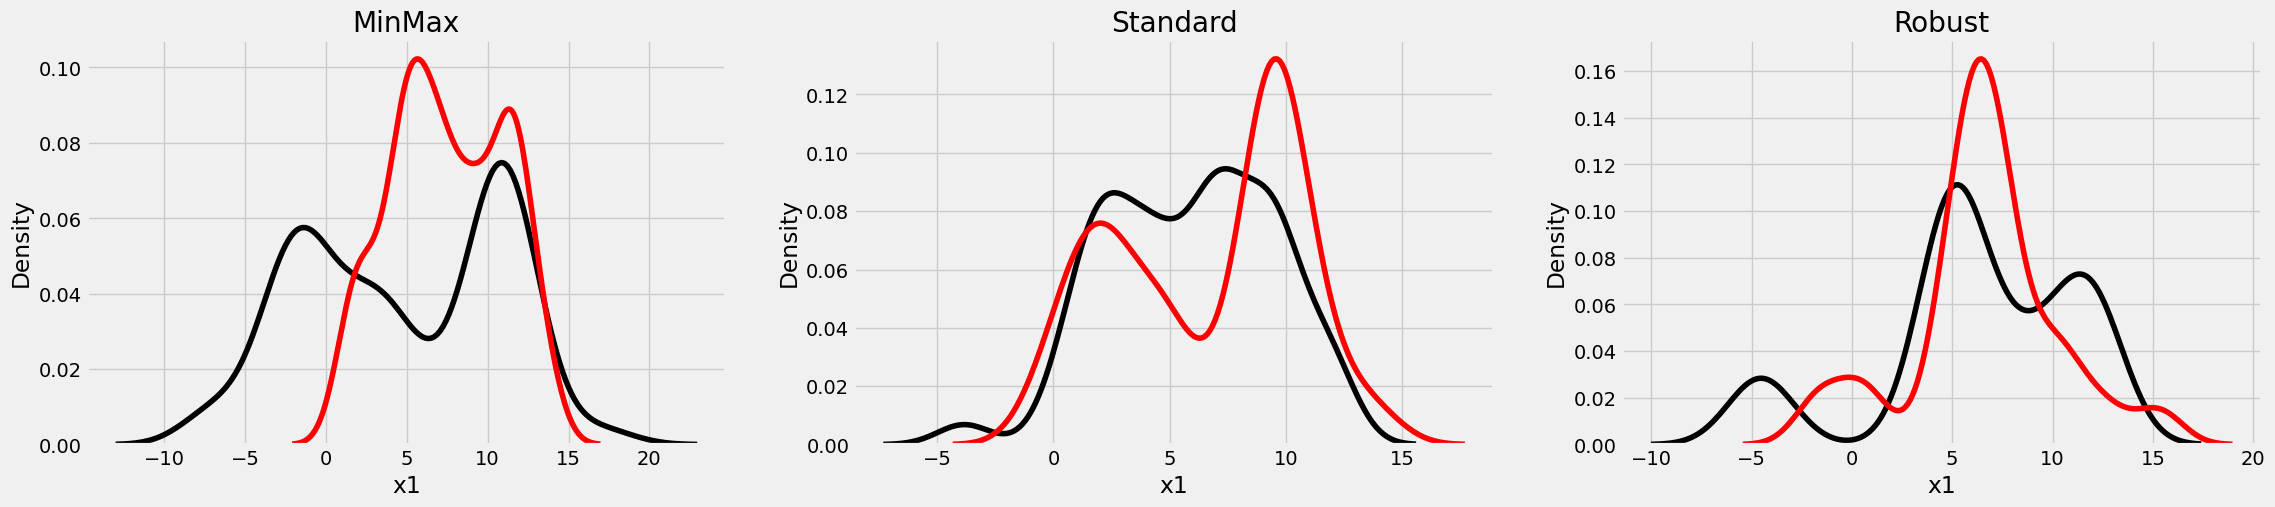

In [6]:

tprint("UMAP")
matplotlib.style.use('fivethirtyeight')
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5))
ax1.set_title('MinMax')
ax2.set_title('Standard')
ax3.set_title('Robust')
sns.kdeplot(x_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(x_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(x_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(x_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(x_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(x_df3['x2'], ax = ax3, color ='red')
plt.show()

### t-SNE начинается с определения сходства точек на основе расстояний между ними. Близлежащие точки считаются похожими, в то время как удаленные считаются непохожими. Для этого измеряются расстояния между интересующей точкой и другими точками, после чего они помещаются на нормальную кривую.

 _____  ____   _   _  _____ 
|_   _|/ ___| | \ | || ____|
  | |  \___ \ |  \| ||  _|  
  | |   ___) || |\  || |___ 
  |_|  |____/ |_| \_||_____|
                            



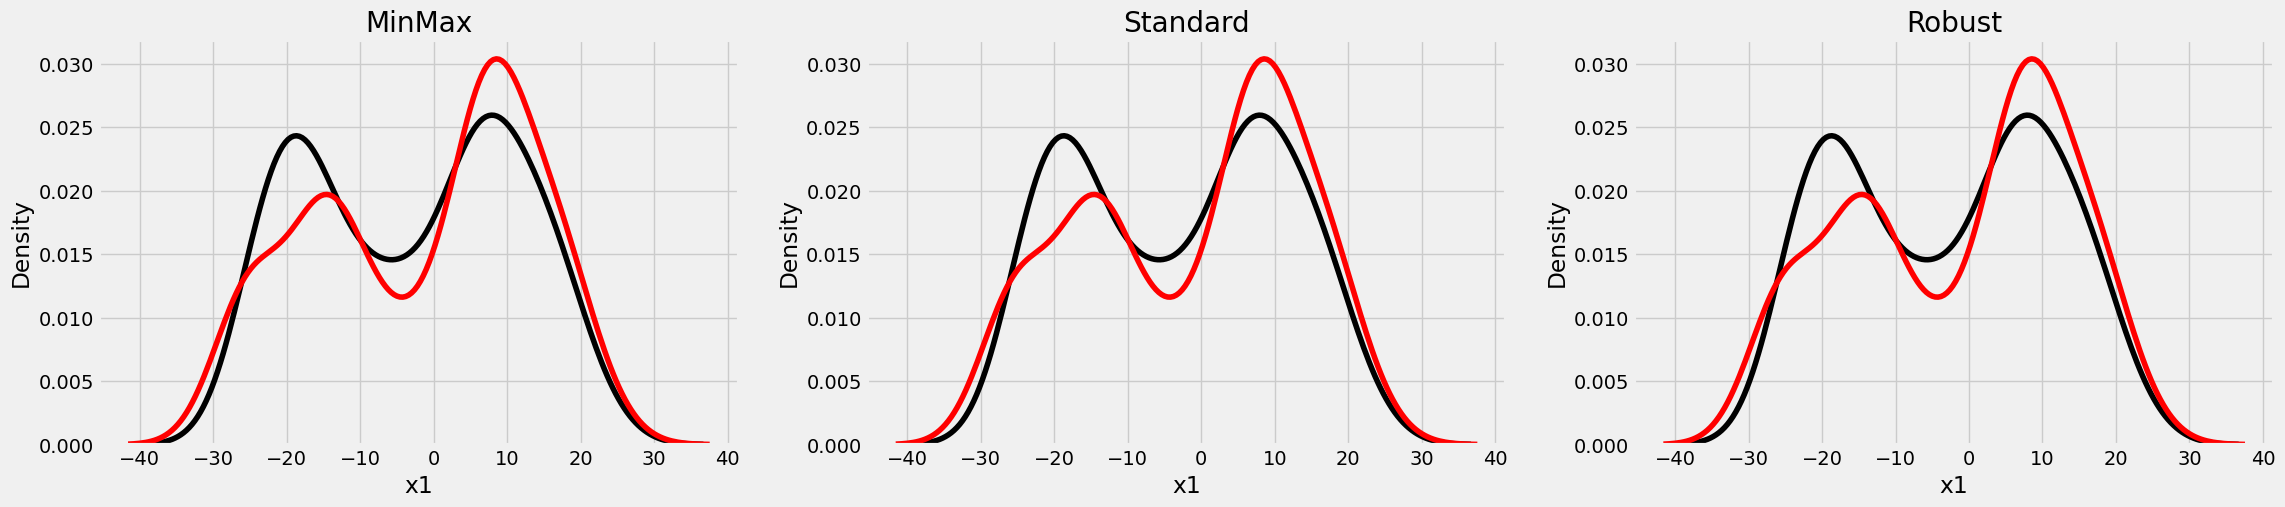

In [8]:

tprint("TSNE")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5))
ax1.set_title('MinMax')
ax2.set_title('Standard')
ax3.set_title('Robust')
sns.kdeplot(y_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(y_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(y_df1['x1'], ax = ax2, color ='black')
sns.kdeplot(y_df1['x2'], ax = ax2, color ='red')

sns.kdeplot(y_df1['x1'], ax = ax3, color ='black')
sns.kdeplot(y_df1['x2'], ax = ax3, color ='red')
plt.show()